<a href="https://colab.research.google.com/github/sommoMicc/DeepLearning-Homeworks/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [0]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


###Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [0]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 1s 3ms/step - loss: 0.7356 - accuracy: 0.7605 - val_loss: 0.5227 - val_accuracy: 0.8220
Epoch 2/10
430/430 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.8318 - val_loss: 0.4501 - val_accuracy: 0.8484
Epoch 3/10
430/430 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8501 - val_loss: 0.4142 - val_accuracy: 0.8608
Epoch 4/10
430/430 [==============================] - 1s 3ms/step - loss: 0.4044 - accuracy: 0.8603 - val_loss: 0.3937 - val_accuracy: 0.8680
Epoch 5/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8678 - val_loss: 0.3793 - val_accuracy: 0.8714
Epoch 6/10
430/430 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8717 - val_loss: 0.3717 - val_accuracy: 0.8734
Epoch 7/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8752 - val_loss: 0.3677 - val_accuracy: 0.8740
Epoch 

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

313/313 - 0s - loss: 0.3787 - accuracy: 0.8662
accuracy: 86.62%


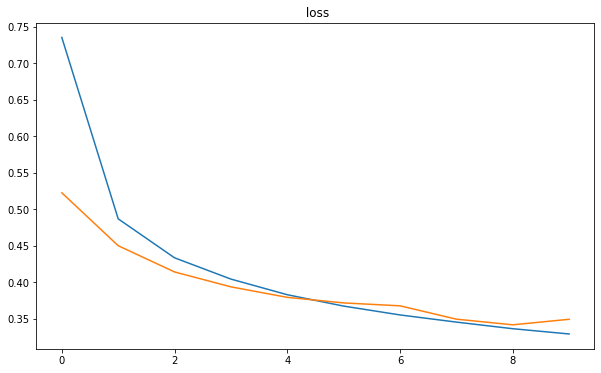

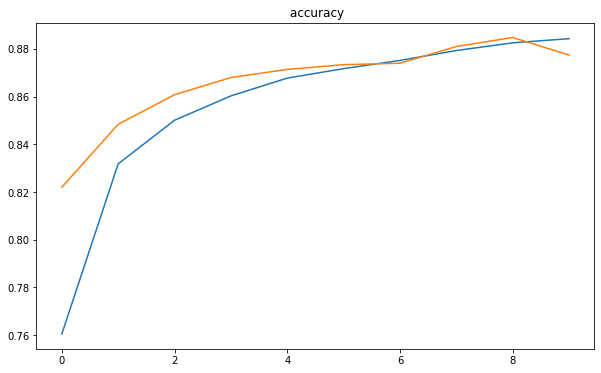

In [0]:
def plot_loss(history, name=""):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('%s loss' % name)

def plot_accuracy(history, name=""):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('%s accuracy' % name)

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

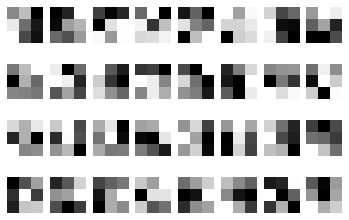

In [0]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
flatten_21 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                62730     
Total params: 72,298
Trainable params: 72,298
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
215/215 [==============================] - 2s 8ms/step - loss: 0.9204 - accuracy: 0.7012 - val_loss: 0.

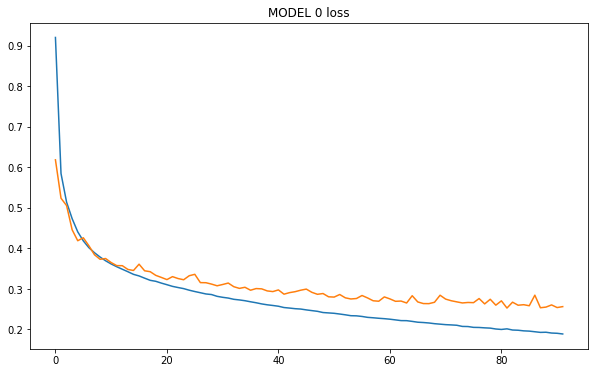

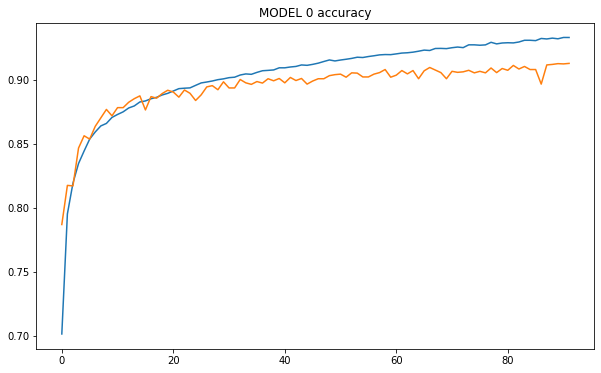

In [0]:
# MODEL 0
"""
- Added a new layer
- Added early stopping
- Changed batch size
"""
model_name = "MODEL 0"
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
"""
EARLY STOPPING
"""
import os, time

#Let's define a log dir in order to save the checkpoint file
logdir = os.path.join(os.curdir, "my_logs", "run_{}".format(time.time()))
patiente = 10
max_epoch = 500

#In Keras the Eraly stopping is manage by using the callbacks argument.
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=patiente), #To complete: play with patience and find the value that prevents the model from overfitting
    #Saving the checkpoints file allows to load the "best" model when the Early 
    #stopping detect that the generalization error degrade (after 'patience' epochs)
    keras.callbacks.ModelCheckpoint("cnn.model", save_best_only=True),
]
"""
FINE EARLY STOPPING
"""
model.summary()
history = model.fit(X_train, y_train, epochs=max_epoch, batch_size=256,
                    validation_data=(X_valid, y_valid), callbacks=callbacks)

plot_loss(history, model_name)

plot_accuracy(history, model_name)

model = keras.models.load_model("cnn.model")
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %s: %.2f%%" % (model_name, model.metrics_names[1], scores[1]*100))
# FINE MODEL 0

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 16)        8208      
_________________________________________________________________
flatten_22 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                31370     
Total params: 40,122
Trainable params: 40,122
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
215/215 [==============================] - 2s 9ms/step - loss: 0.9427 - accuracy: 0.6859 - val_loss: 0.

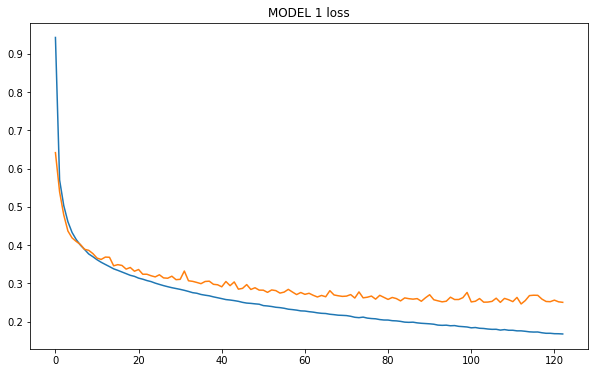

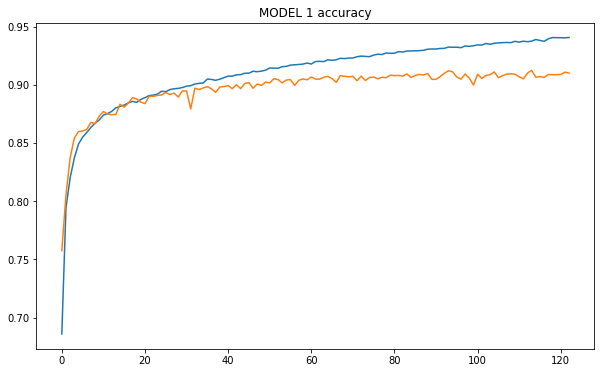

In [0]:
# MODEL 1
"""
- Played with filters size and kernel size
"""
model_name = "MODEL 1"
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[4,4], padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
"""
EARLY STOPPING
"""
import os, time

#Let's define a log dir in order to save the checkpoint file
logdir = os.path.join(os.curdir, "my_logs", "run_{}".format(time.time()))
patiente = 10
max_epoch = 500

#In Keras the Eraly stopping is manage by using the callbacks argument.
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=patiente), #To complete: play with patience and find the value that prevents the model from overfitting
    #Saving the checkpoints file allows to load the "best" model when the Early 
    #stopping detect that the generalization error degrade (after 'patience' epochs)
    keras.callbacks.ModelCheckpoint("cnn.model", save_best_only=True),
]
"""
FINE EARLY STOPPING
"""
model.summary()
history = model.fit(X_train, y_train, epochs=max_epoch, batch_size=256,
                    validation_data=(X_valid, y_valid), callbacks=callbacks)

plot_loss(history, model_name)

plot_accuracy(history, model_name)

model = keras.models.load_model("cnn.model")
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %s: %.2f%%" % (model_name, model.metrics_names[1], scores[1]*100))
# FINE MODEL 1

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 16)        8208      
_________________________________________________________________
flatten_23 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 3136)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                31370     
Total params: 40,122
Trainable params: 40,122
Non-trainable params: 0
_________________________________________________

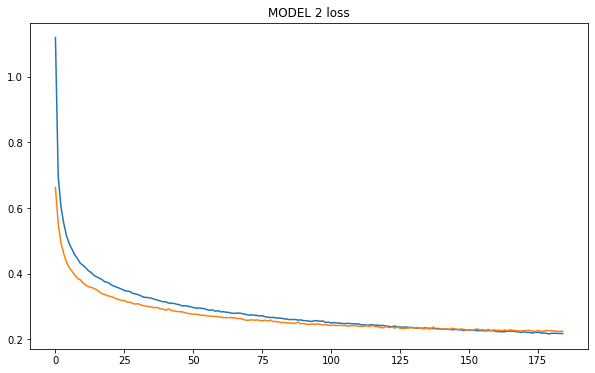

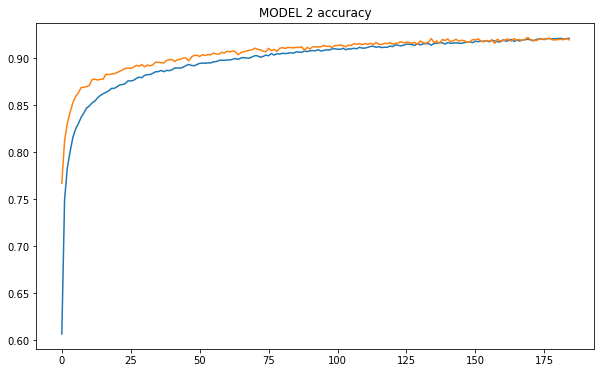

In [0]:
# MODEL 2
model_name = "MODEL 2"
"""
- Added a dropout layer
"""
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[4,4], padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
"""
EARLY STOPPING
"""
import os, time

#Let's define a log dir in order to save the checkpoint file
logdir = os.path.join(os.curdir, "my_logs", "run_{}".format(time.time()))
patiente = 10
max_epoch = 500

#In Keras the Eraly stopping is manage by using the callbacks argument.
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=patiente), #To complete: play with patience and find the value that prevents the model from overfitting
    #Saving the checkpoints file allows to load the "best" model when the Early 
    #stopping detect that the generalization error degrade (after 'patience' epochs)
    keras.callbacks.ModelCheckpoint("cnn.model", save_best_only=True),
]
"""
FINE EARLY STOPPING
"""
model.summary()
history = model.fit(X_train, y_train, epochs=max_epoch, batch_size=256,
                    validation_data=(X_valid, y_valid), callbacks=callbacks)

plot_loss(history, model_name)

plot_accuracy(history, model_name)

model = keras.models.load_model("cnn.model")
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %s: %.2f%%" % (model_name, model.metrics_names[1], scores[1]*100))
# FINE MODEL 2

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 16)        8208      
_________________________________________________________________
flatten_30 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 3136)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 192)               602304    
_________________________________________________________________
dropout_25 (Dropout)         (None, 192)             

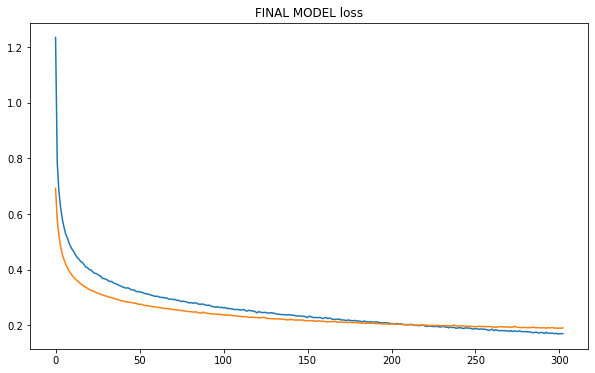

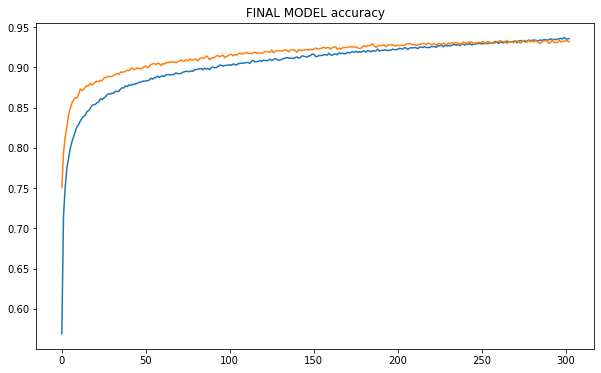

In [0]:
# FINAL MODEL
"""
- Added a dense layer and a dropout layer
"""
model_name = "FINAL MODEL"
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[4,4], padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16*12, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
"""
EARLY STOPPING
"""
import os, time

#Let's define a log dir in order to save the checkpoint file
logdir = os.path.join(os.curdir, "my_logs", "run_{}".format(time.time()))
patiente = 10
max_epoch = 500

#In Keras the Eraly stopping is manage by using the callbacks argument.
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=patiente), #To complete: play with patience and find the value that prevents the model from overfitting
    #Saving the checkpoints file allows to load the "best" model when the Early 
    #stopping detect that the generalization error degrade (after 'patience' epochs)
    keras.callbacks.ModelCheckpoint("cnn.model", save_best_only=True),
]
"""
FINE EARLY STOPPING
"""
model.summary()

history = model.fit(X_train, y_train, epochs=max_epoch, batch_size=256,
                    validation_data=(X_valid, y_valid), callbacks=callbacks)

plot_loss(history, model_name)

plot_accuracy(history, model_name)

model = keras.models.load_model("cnn.model")
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %s: %.2f%%" % (model_name, model.metrics_names[1], scores[1]*100))
# FINE FINAL MODEL

### Test results discussion
The best model that I found is composed by the following layers:
- A convolutional (Conv2D) layer, with 32 filters of size 4x4
- A max-pooling (MaxPool2D) layer, which filter size is 2x2
- Another convolutional (Conv2D) layer, with 16 filters of size 4x4
- A flatten layer,
- A dropout layer, whose rate is set to 0.5
- A fully-connected (Dense) layer of 192 neurons and with ReLU activation function
- Another dropout layer, with rate set to 0.3
- The final fully-connected (Dense) layer, with 10 outputs and softmax as activation

The model uses also early stopping, with the maximum number of epochs set to 500 and a patience (number of epochs with no improvement) set to 10.

The achieved accuracy in the test set is 92.38%.


Discussion:
Before starting the exercise, I set an accuracy goal: my proposed model should have had at least 91% accuracy. This model is the result of a thought process, which starts from the proposed _"Simple CNN"_ model and passes among the steps described in the next section.
I eventually came up with a model that has about 10 times the number of parameter of the starting one (612,986 vs 63,050). However, it offers a 4% performance improvement which, although it might not seems a lot, reaches (and overtakes) the preset accuracy goal.

The reasoning behind his construction is described in the next section, since it is a result of a process which passes among some intermediate steps, that are the other four model tested. Right now I can say that, since the final model is very prone to overfit, the two dropout layers play an important role stabilizing the loss function (so the accuracy), as we can see from the following graph:
![Final model - accuracy](https://drive.google.com/uc?id=13bdp2ceda1DMJ2DRz8A-iy1qmCKJgZeV)

However, I consider its behaviour more than acceptable, because training and test accuracies haven't a radically different trend, although there are still signs of overfit.

Besides, I also tested other models: 
* __Model 0__, obtained from the proposed model with the addition of another convolutional layer, the early stopping (with patience=10) and an increased batch size of 256. Its structure is the following:
  * A convolutional (Conv2D) layer, with 32 filters of size 3x3
  * A max-pooling (MaxPool2D) layer, which filter size is 2x2
  * Another convolutional (Conv2D) layer, with 32 filters of size 3x3
  * A flatten layer,
  * The final fully-connected (Dense) layer, with 10 outputs and softmax as activation
* __Model 1__, whose structure is nearly identical to _Model 0_ despite the number of filters and their size in the two convolutional layers. In particular its structure is the following:
  * A convolutional (Conv2D) layer, with 32 filters of size 4x4
  * A max-pooling (MaxPool2D) layer, which filter size is 2x2
  * Another convolutional (Conv2D) layer, with 16 filters of size 2x2,
  * A flatten layer,
  * The final fully-connected (Dense) layer, with 10 outputs and softmax as 
* __Model 2__, which add a Dropout layer after the last convolutional layer of model 1. So, it's composed by:
  - A convolutional (Conv2D) layer, with 32 filters of size 4x4
  - A max-pooling (MaxPool2D) layer, which filter size is 2x2
  - Another convolutional (Conv2D) layer, with 16 filters of size 4x4
  - A flatten layer
  - A dropout layer, whose rate is set to 0.5
  - The final fully-connected (Dense) layer, with 10 outputs and softmax as activation

_Note that the final model has been created starting from _Model 2_, with the addition of a fully-connected (dense) layer and another dropout one._

Discussion:

Analyzing the behavior of the proposed _Simple CNN_ model, I thought that, since its training accuracy is not very low, it does not exploits all the features of the input. In other words, I thought that the model is too simple, so I decided to add another convolutional layer (identical to the first) in order to complicate it. Also, since I noticed some overfit on the _Simple CNN_ model, I implemented the early stopping as regularization. Finally, I played a bit with the batch size and I found that 256 seems to be the best value. The result is a model that offers 90.64% of accuracy (about 4% improvement) on the test set, and its accuracy history is shown below:

![Model 0 - Accuracy](https://drive.google.com/uc?id=1MOQ6F0eoENVbGmjVUQAJgRYAZ4nOHcsz)

Here it is very evident the overfit, that starts to be very significant, so I thought it would have been a good idea to reduce the number of parameters, playing with the number of filters and their sizes in each convolutional layer. I then came up with _Model 1_, which leads to an accuracy of 90.97%. Although this is tecnically an improvement, in terms of overfit it behaves very similar to _Model 0_, as we can see from the graph below:

![Model 1 - Accuracy](https://drive.google.com/uc?id=1SszUpbooBwgiIJW89Butxy1BpZkflNam)

Essentially this means that the number of parameters is still to high, so I decided to include a Dropout layer right before the last (Dense) one. I had to tweak a bit the rate of the dropout (I tested 0.3, 0.5, 0.7), and I found that 0.5 was the best choice. The resulting model, which is _Model 2_, provides an accuracy of 91.23%, but the most important thing is that it does not overfit very badly, as we can see from the picture below:

![Model 2 - Accuracy](https://drive.google.com/uc?id=1ribL_y-k_Wb0KprzKkaRhjcBhrPqC22-)

In fact, its training and validation accuracies are very similar, so I thought about complicating it again. After few tries I added a Dense layer (192 neurons) followed by another Dropout layer (this time with rate 0.3), and the resulting model is the _final model_ (92.38% accuracy).